In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_excel('Food Delivery Time Prediction Case Study.xlsx')

### 1. **Relationship Between Ratings and Delivery Time**
From the regression analysis, we observed a **negative correlation** between **Delivery Person Ratings** and **Delivery Time**:
- When delivery time is shorter, the ratings given to delivery persons tend to be higher. This indicates that faster delivery services play a crucial role in enhancing customer satisfaction.
- This provides a clear optimization direction for the platform: improving logistics efficiency, such as better route planning and increasing the average speed of delivery personnel, can significantly improve user experience.


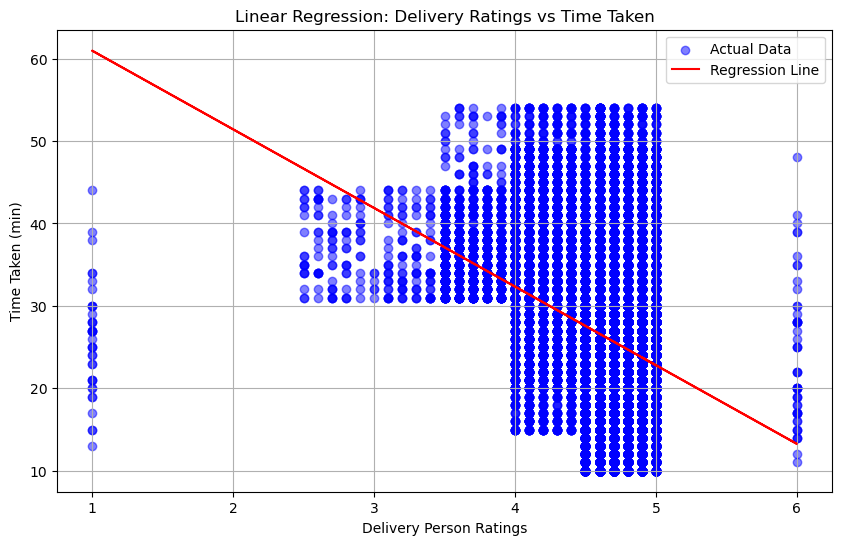

Mean Squared Error (MSE): 78.52949712994987
R² Score: 0.10434345368386344


In [3]:
# Prepare data for linear regression
X = df[["Delivery_person_Ratings"]].values  # Independent variable
y = df["Time_taken(min)"].values  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display regression results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="blue", alpha=0.5, label="Actual Data")
plt.plot(X_test, y_pred, color="red", label="Regression Line")
plt.title("Linear Regression: Delivery Ratings vs Time Taken")
plt.xlabel("Delivery Person Ratings")
plt.ylabel("Time Taken (min)")
plt.legend()
plt.grid(True)
plt.show()

# Output performance metrics
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

### 2. **Relationship Between Delivery Time and Key Factors**
Using the Random Forest model, we examined the relationship between **Delivery Time** and the factors:
- **Delivery Person Ratings**: Higher ratings generally correlate with shorter delivery times, emphasizing the importance of speed in customer satisfaction.
- **Type of Order**: Different types of orders (e.g., snacks, drinks, meals) affect delivery time. For example, drinks may have shorter preparation times compared to full meals, which could influence the total time taken.
- **Type of Vehicle**: Delivery vehicles (e.g., motorcycles vs. scooters) also impact delivery time, with motorcycles often being faster due to their maneuverability.


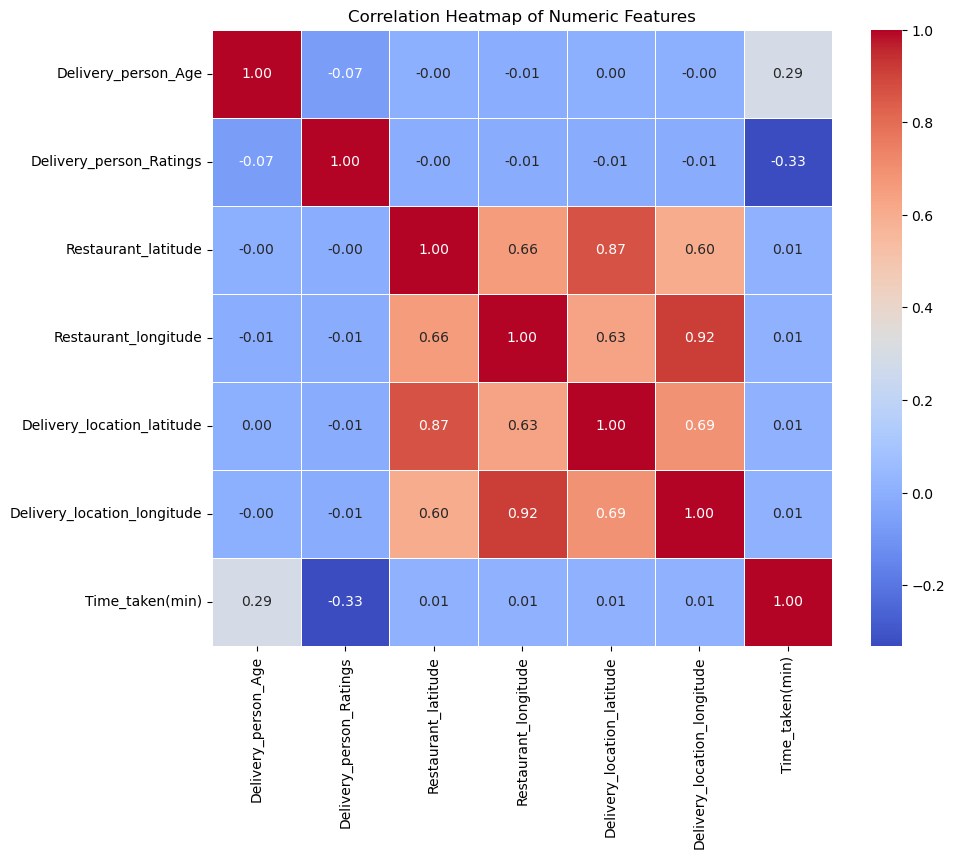

In [4]:
# Calculate the correlation matrix
numeric_columns = df.select_dtypes(include=np.number)  # Select numeric columns
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [5]:
# Prepare data for prediction
X = df[["Delivery_person_Ratings", "Type_of_order", "Type_of_vehicle"]]
y = df["Time_taken(min)"]

# Preprocessing: One-hot encoding for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), ["Type_of_order", "Type_of_vehicle"])
    ],
    remainder="passthrough",
)

# Define the Random Forest model within a pipeline
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output metrics
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

Mean Absolute Error (MAE): 6.487412492820634
R² Score: 0.21107488782241035


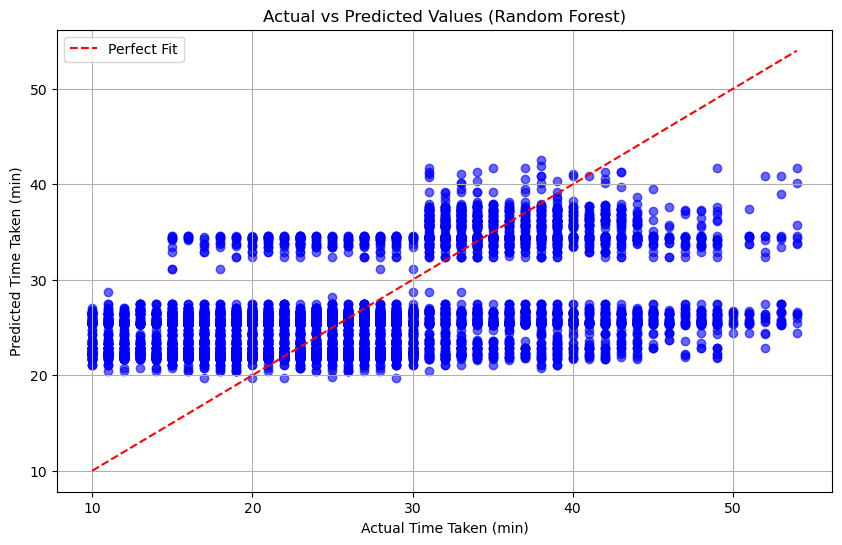

In [6]:
# Calculate residuals for the performance metric plot
residuals = y_test - y_pred

# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Fit")
plt.title("Actual vs Predicted Values (Random Forest)")
plt.xlabel("Actual Time Taken (min)")
plt.ylabel("Predicted Time Taken (min)")
plt.legend()
plt.grid(True)
plt.show()

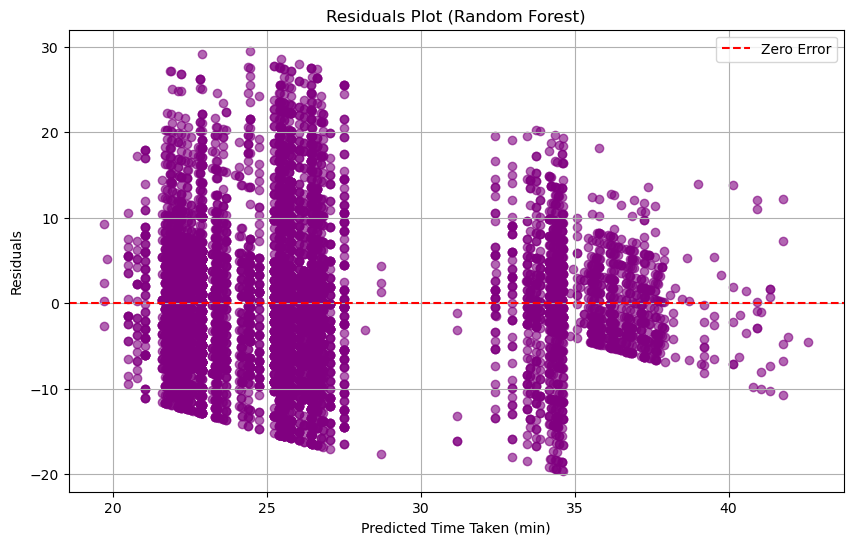

In [7]:
# Residuals plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color="purple")
plt.axhline(y=0, color='r', linestyle='--', label="Zero Error")
plt.title("Residuals Plot (Random Forest)")
plt.xlabel("Predicted Time Taken (min)")
plt.ylabel("Residuals")
plt.legend()
plt.grid(True)
plt.show()

### Business Insights
- **Optimize Delivery Assignments**: Assign orders with strict time constraints (e.g., snacks or drinks) to delivery personnel with higher ratings and faster vehicles, ensuring quicker deliveries and better customer satisfaction.
- **Vehicle Investments**: Encourage or incentivize delivery personnel to use faster vehicles like motorcycles to reduce delivery time.
- **Customer Expectations Management**: Highlight estimated delivery times based on the type of order to set realistic customer expectations and potentially reduce dissatisfaction.
- **Training Programs**: Provide training to delivery personnel on route optimization and customer service to improve ratings and efficiency simultaneously.
